<a href="https://colab.research.google.com/github/ejwood1005/Melanoma_CNN/blob/main/Copy_of_Melanoma_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Defining Parameters

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% Data for Training and 20% for Testing

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


DATA VISUALIZATION

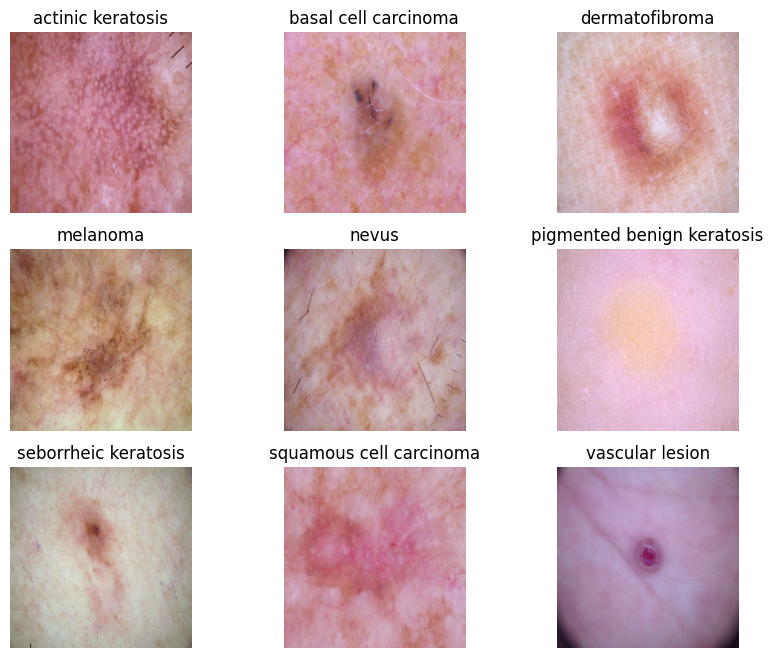

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for i in range(len(class_names)):
  filtered_ds = train_ds.filter(lambda x,l:tf.math.equal(l[0], i))
  for image, label in filtered_ds.take(1):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Model Creation

Creating a CNN Model to detect the 9 classes present

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Model Compilation

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

MODEL TRAINING

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 72s 1s/step - loss: 2.0327 - accuracy: 0.2573 - val_loss: 1.7571 - val_accuracy: 0.3960
Epoch 2/20
56/56 [==============================] - 64s 1s/step - loss: 1.6187 - accuracy: 0.4263 - val_loss: 1.5709 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 66s 1s/step - loss: 1.4367 - accuracy: 0.5045 - val_loss: 1.4197 - val_accuracy: 0.5280
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 1.3633 - accuracy: 0.5290 - val_loss: 1.4647 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 64s 1s/step - loss: 1.2723 - accuracy: 0.5463 - val_loss: 1.4036 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 64s 1s/step - loss: 1.2158 - accuracy: 0.5714 - val_loss: 1.3709 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 64s 1s/step - loss: 1.1233 - accuracy: 0.6004 - val_loss: 1.4993 - val_accuracy: 0.5190
Epoch 8/20
56/56 [==

Training Results Visualization

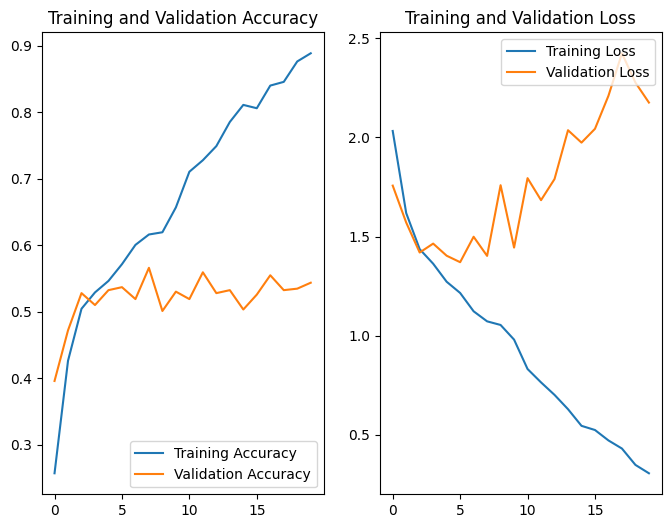

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Pointers:

There is huge variance between the Training Accuracy & Validation Acuracy.

Training Accuracy is at approx 90% and validation accuracy at approx 55% is indicating that there is an overfitting issue.

Applying Data Augmentation Techinique to resolve the overfitting issue.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

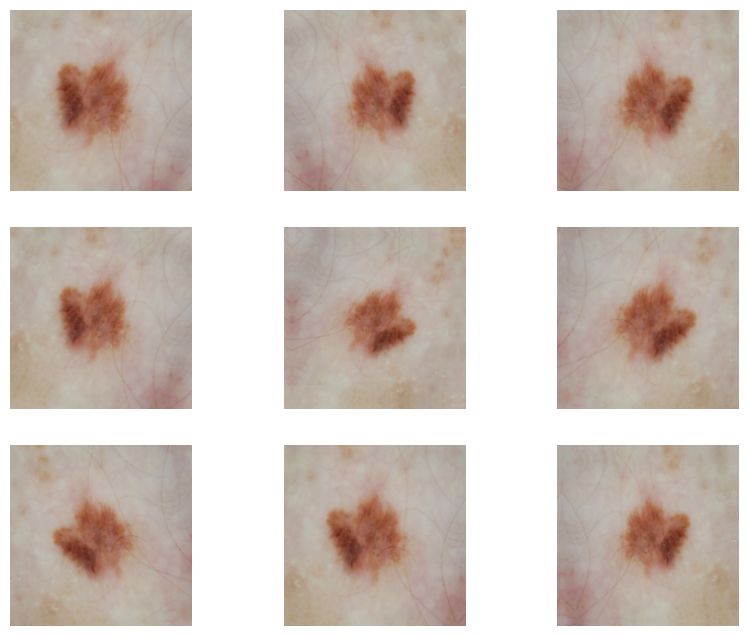

In [ ]:
plt.figure(figsize=(10,8 ))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Model Creation, Compilation & Training

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 75s 1s/step - loss: 2.0457 - accuracy: 0.2561 - val_loss: 1.8064 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 76s 1s/step - loss: 1.4778 - accuracy: 0.4821 - val_loss: 1.6059 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 73s 1s/step - loss: 1.4740 - accuracy: 0.4799 - val_loss: 1.4681 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 73s 1s/step - loss: 1.3632 - accuracy: 0.5268 - val_loss: 1.3474 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 80s 1s/step - loss: 1.3028 - accuracy: 0.5257 - val_loss: 1.4847 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 74s 1s/step - loss: 1.3111 - accuracy: 0.5329 - val_loss: 1.3841 - val_accuracy: 0.4944
Epoch 8/20
56/56 [==============================] - 75s 1s/step - loss: 1.2965 - accuracy: 0.5391 - val_loss: 1.3649 - val_accuracy: 0.5235
Epoch 9/20
56/56 [==

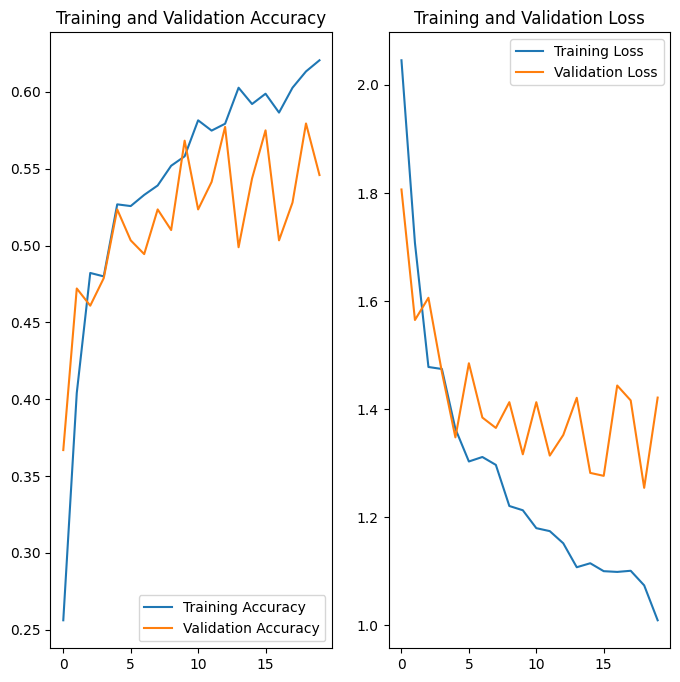

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Inference:

The varaince in Training Acccuracy & Validation Accuracy has substancially reduced from Training Accuracy is at approx 90% and validation accuracy at approx 55% without data augmentation.

The current training accuracy approx 60% and Test Accuracy greater than 50%.

Looking at enhancing the accuracy of the model using Class Distribution and reducing the imbalances.

Class Distribution

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
1,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
2,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
3,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
4,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion
2235,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion
2236,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion
2237,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


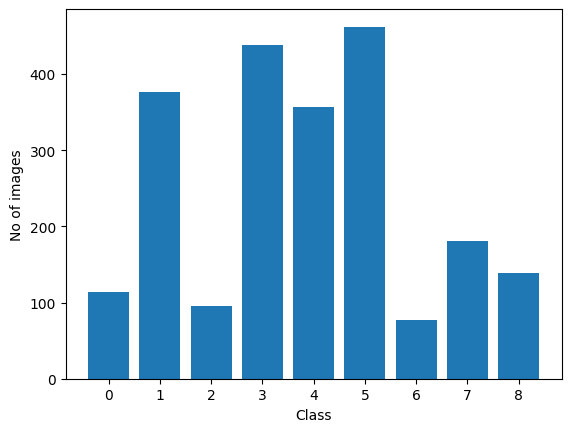

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()

Class 5 has the highest sample size & Class 6 has the lowest sample size.

Model Imbalance Rectification

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset = '/content/drive/MyDrive/Train'
import Augmentor
for i in class_names:
#     print(str(path_to_training_dataset) + "/" + i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i, output_directory = '/kaggle/working/' + i +'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4768F53B20>: 100%|██████████| 500/500 [00:20<00:00, 24.14 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4768F67E50>: 100%|██████████| 500/500 [00:20<00:00, 24.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47690B52A0>: 100%|██████████| 500/500 [00:19<00:00, 25.21 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4768F89F00>: 100%|██████████| 500/500 [01:48<00:00,  4.59 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F476F24FE50>: 100%|██████████| 500/500 [01:31<00:00,  5.45 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47690700A0>: 100%|██████████| 500/500 [00:19<00:00, 25.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F47690701C0>: 100%|██████████| 500/500 [00:46<00:00, 10.71 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4768FC0610>: 100%|██████████| 500/500 [00:19<00:00, 25.49 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/vascular lesion/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4768F4BA60>: 100%|██████████| 500/500 [00:20<00:00, 24.27 Samples/s]


In [ ]:
output_dir = pathlib.Path('/kaggle/working/')

In [ ]:
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
path_list = [x for x in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
path_list[:5]

['/kaggle/working/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027719.jpg_4afc1774-5d78-4184-80d7-00feeaf4db08.jpg',
 '/kaggle/working/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027767.jpg_75e63432-7ca2-472e-a7a3-225b7d0f32eb.jpg',
 '/kaggle/working/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027343.jpg_c9c9b23c-6dd1-457a-99df-fa5add5c7c6f.jpg',
 '/kaggle/working/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028158.jpg_c3652a93-163e-4da8-9ef7-77e294b0c512.jpg',
 '/kaggle/working/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028730.jpg_071b359f-cb5b-4b71-b7e5-687b26857f87.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
lesion_list_new[:5]

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma']

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df._append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

Training Model on Augmentor Data

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 105s 2s/step - loss: 2.0566 - accuracy: 0.2584 - val_loss: 1.7462 - val_accuracy: 0.4094
Epoch 2/20
56/56 [==============================] - 98s 2s/step - loss: 1.6438 - accuracy: 0.4241 - val_loss: 1.5712 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 97s 2s/step - loss: 1.5521 - accuracy: 0.4526 - val_loss: 1.4905 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 97s 2s/step - loss: 1.4090 - accuracy: 0.5123 - val_loss: 1.4209 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 97s 2s/step - loss: 1.3723 - accuracy: 0.5067 - val_loss: 1.3946 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 98s 2s/step - loss: 1.3566 - accuracy: 0.5145 - val_loss: 1.3883 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 96s 2s/step - loss: 1.3489 - accuracy: 0.5084 - val_loss: 1.4568 - val_accuracy: 0.4922
Epoch 8/20
56/56 [=

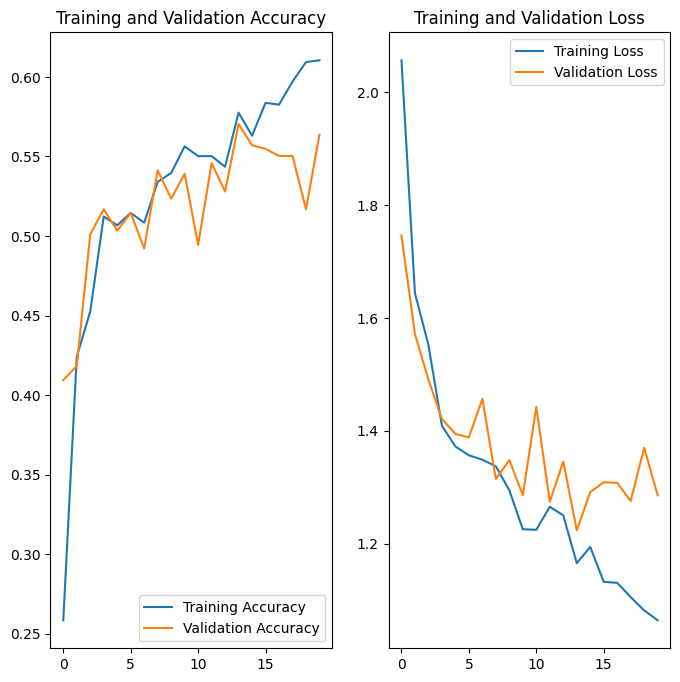

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Inferences:

The model accuracy for Training is around 60% and validation accuracy is around greater than 55%.

There variance has been reduced from the initial model of Training Accuracy at approx 90% and validation accuracy at approx 55% without data augmentation.

After using data augmentation it was around training accuracy approx 60% and Test Accuracy around 50%.

After reducing the class imbalances and data augmentation the training accuracy is greater than 60% and Test Accuracy above 56%, this has helped in better accuracy and resolving overfitting.

With the limited total population sample of 2239 and training sample size of 1792, the results generated have proved that is a good model for prediction.